# Metric Generation

This file will generate all image plots (will be plotted in the notebook and should be manually saved) and differencing images (will be saved in the GAN_difference_imgs folder).

<br>
To run simply restart kernel and run all. This will generate all metrics for the GAN.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def cut_range(arr, num):
    return arr[0:num]

def get_graphs(filepath, loss_num, metric_num):
    g_loss = []
    d_loss = []
    auc_pr = []
    auc_roc = []
    dice_coeff = []
    acc = []
    auc_sum = []
    with open(filepath) as fp:
        line = fp.readline()
        cnt = 1
        while line:
            line = fp.readline()
            main_words = line.split()

            if '*** Iteration' in line:
                next_line = fp.readline()
                sub_words = next_line.split()
                if sub_words[0] == 'd_loss':
                    d_loss.append(float(sub_words[2].replace(',','')))
                elif sub_words[0] == 'g_loss':
                    g_loss.append(float(sub_words[2].replace(',','')))
                else:
                    auc_pr.append(float(sub_words[2].replace(',','')))
                    next_line = fp.readline()
                    sub_words = next_line.split()
                    auc_roc.append(float(sub_words[2].replace(',','')))
                    next_line = fp.readline()
                    sub_words = next_line.split()
                    dice_coeff.append(float(sub_words[2].replace(',','')))
                    next_line = fp.readline()
                    sub_words = next_line.split()
                    acc.append(float(sub_words[2].replace(',','')))
                    next_line = fp.readline()
                    sub_words = next_line.split()                    
                    auc_sum.append(float(sub_words[2].replace(',','')))

            cnt += 1
    
    
    loss_range = range(100, len(d_loss)*100+1, 100)
    loss_range = cut_range(loss_range, loss_num)
    d_loss = cut_range(d_loss, loss_num)
    g_loss = cut_range(g_loss, loss_num)
    auc_pr = cut_range(auc_pr, metric_num)
    auc_roc = cut_range(auc_roc, metric_num)
    dice_coeff = cut_range(dice_coeff, metric_num)
    auc_sum = cut_range(auc_sum, metric_num)
    acc = cut_range(acc, metric_num)
    plt.figure()
    plt.plot(loss_range, d_loss)
    plt.plot(loss_range, g_loss)
    plt.legend(('Discriminator Loss', 'Generator Loss'))
    plt.title(filepath[0:5]+': Loss vs Iteration')
    plt.ylabel('Loss')
    plt.xlabel('Iteration')

    metric_range = range(500, len(auc_pr)*500+1, 500)
    plt.figure()
    plt.plot(metric_range, auc_pr)
    plt.plot(metric_range, auc_roc)
    plt.plot(metric_range, dice_coeff)
    plt.plot(metric_range, acc)
    plt.plot(metric_range, auc_sum)
    plt.legend(('AUC PR', 'AUC ROC', 'Dice', 'Accuracy', 'AUC Sum'))
    plt.title(filepath[0:5]+': Score vs Iteration')
    plt.ylabel('Score')
    plt.xlabel('Iteration')
    print('Best AUC PR: '+str(np.max(auc_pr)))
    print('Best AUC ROC: '+str(np.max(auc_roc)))
    print('Best Dice: '+str(np.max(dice_coeff)))
    print('Best Acc: '+str(np.max(acc)))
    print('Best AUC Sum: '+str(np.max(auc_sum)))

Best AUC PR: 0.765179
Best AUC ROC: 0.909608
Best Dice: 0.743937
Best Acc: 0.943521
Best AUC Sum: 0.783077


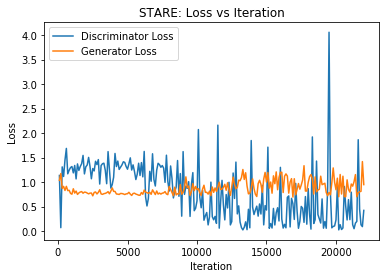

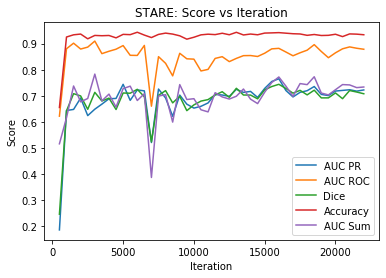

In [2]:
filepath = 'STARE_50k_demo.txt'
get_graphs(filepath, 220, 44)

Best AUC PR: 0.822135
Best AUC ROC: 0.956901
Best Dice: 0.799085
Best Acc: 0.951904
Best AUC Sum: 0.88352


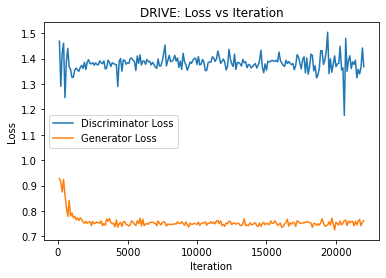

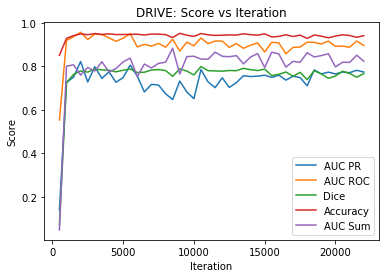

In [3]:
filepath = 'DRIVE_50k_demo.txt'
get_graphs(filepath, 220, 44)

In [4]:
#The following data was obtained by running Unet and manually ported over to this file for further processing
x_range = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 2020]

D_auc_roc_y = [0.5, 0.5, 0.4957049467896134, 0.4614907719563936, 0.5471520675683483, 0.6309246062160153, 0.7353326860639712, 0.8070964885385699, 0.8282585832844453, 0.8338813471466848, 0.8398464088027495, 0.8301368843852099, 0.8298521993455813, 0.8386412510841028, 0.8448113368850281, 0.849646541826927, 0.847840738542455, 0.8391743258624065, 0.8445871754731282, 0.8405085746061255, 0.8471491170364519, 0.8437596940432377, 0.8402142985767632]
D_dice_y = [0.2552282464439533, 0.2552282464439533, 0.001894942034876068, 0.10615044979625184, 0.17241356134719632, 0.4096518942267215, 0.6252311389405649, 0.7177648386373432, 0.7481443785381668, 0.7554273643329515, 0.7629844977261667, 0.7474901781463815, 0.7432749300622932, 0.7539378369102734, 0.7648976365922243, 0.7664921255301922, 0.7674121715321289, 0.7651965703319938, 0.7705344824444056, 0.7571750765849372, 0.769403194562076, 0.7550153199499843, 0.7645613484662185]
D_auc_pr_y = [0.5732109069824218, 0.5732109069824218, 0.08308919017513078, 0.17248827300564482, 0.536049765511997, 0.6605344609237596, 0.7352677343365527, 0.7586366316932082, 0.7826681127048359, 0.7874904045657352, 0.7929680693364538, 0.7796555721177175, 0.7737838454237556, 0.7820716947150286, 0.7920035455409217, 0.791155208728733, 0.7934285730575564, 0.7966987347295941, 0.7996635530470596, 0.7849258598426081, 0.7966054227753105, 0.7804231758347739, 0.7947992333817857]

S_auc_roc_y = [0.49494339995404857, 0.5, 0.5000008854415696, 0.5199556392019635, 0.49473540032272395, 0.5325152941933752, 0.557581601037841, 0.6021838669645774, 0.5746670592992437, 0.6765334251984767, 0.6255636832568546, 0.6515143876785592, 0.7394822578654117, 0.7298003881284268, 0.7475604912437909, 0.764185744484603, 0.7711547067568788, 0.775732145189735, 0.7701730325017125, 0.7732460313265196, 0.784664812721179, 0.7810825843322553, 0.7924425639453381]
S_dice_y = [0.21436389707801226, 0.21695797234266673, 0.21695829816950093, 0.09827487131812948, 0.01172112067810234, 0.12005113195636699, 0.20317996703872981, 0.3190849162404714, 0.24950757111394517, 0.5058623159466692, 0.38548553321020296, 0.43926082423209073, 0.5816086114695389, 0.5982987456717282, 0.6319880100507087, 0.6622153268491615, 0.6683186290318077, 0.6775921847739659, 0.6651631640670079, 0.6729614791004681, 0.6916772810407674, 0.6814987002188914, 0.7014264098380858]
S_auc_pr_y = [0.5450804123510491, 0.5611862182617188, 0.5611863238171017, 0.23580421242289568, 0.09270495868000059, 0.40995254696006295, 0.40048567956285097, 0.45101872912136676, 0.3448300643244773, 0.664388129392038, 0.5928684422456258, 0.5817529878107666, 0.6267608081323754, 0.6909967275116822, 0.719101406700638, 0.7493548005162941, 0.7470701311850652, 0.7468904324964777, 0.7456728587886101, 0.7412009993192645, 0.7556734319636174, 0.7462081442681971, 0.7593464276904957]

print('DRIVE:')
print('Best AUC PR: '+str(np.max(D_auc_pr_y)))
print('Best AUC ROC: '+str(np.max(D_auc_roc_y)))
print('Best Dice: '+str(np.max(D_dice_y)))

print('STARE:')
print('Best AUC PR: '+str(np.max(S_auc_pr_y)))
print('Best AUC ROC: '+str(np.max(S_auc_roc_y)))
print('Best Dice: '+str(np.max(S_dice_y)))


DRIVE:
Best AUC PR: 0.7996635530470596
Best AUC ROC: 0.849646541826927
Best Dice: 0.7705344824444056
STARE:
Best AUC PR: 0.7593464276904957
Best AUC ROC: 0.7924425639453381
Best Dice: 0.7014264098380858


Text(0.5, 0, 'Iteration')

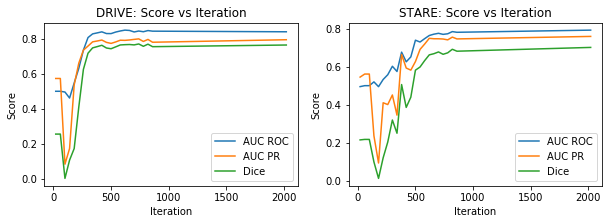

In [5]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x_range, D_auc_roc_y)
plt.plot(x_range, D_auc_pr_y)
plt.plot(x_range, D_dice_y)
plt.legend(('AUC ROC', 'AUC PR', 'Dice'))
plt.title('DRIVE: Score vs Iteration')
plt.ylabel('Score')
plt.xlabel('Iteration')

plt.subplot(122)
plt.plot(x_range, S_auc_roc_y)
plt.plot(x_range, S_auc_pr_y)
plt.plot(x_range, S_dice_y)

plt.legend(('AUC ROC', 'AUC PR', 'Dice'))
plt.title('STARE: Score vs Iteration')
plt.ylabel('Score')
plt.xlabel('Iteration')

# Difference Comparison Processing

In [6]:
#ground_truth = plt.imread('data/STARE/test/1st_manual/im0162.ah.ppm')*1.0
#prediction = plt.imread('STARE/seg_result_image_1_1/im0162.png')

def get_comp(ground_truth, prediction, plot=False):
    #import pdb; pdb.set_trace()
    prediction = prediction*255
    prediction[prediction < 128] = 5
    prediction[prediction >= 128] = 255

    sub = ground_truth - prediction
    img = np.zeros((sub.shape[0],sub.shape[1], 3))
    img[sub == -50] = [0,0,0]
    img[sub == 250] = [0,0.8,1]
    img[sub == 0] = [1,1,1]
    img[sub == -255] = [1,0,0]
    
    if(plot):
        plt.figure(figsize=(10,10))
        plt.imshow(ground_truth,cmap='gray')
        plt.figure(figsize=(10,10))
        plt.imshow(prediction, cmap='gray')
        plt.figure(figsize=(10,10))
        plt.imshow(img)

    return img


In [7]:
import os
import numpy as np

def save_comparisons(dataset, model):
    
    source_dir_gt = 'data/'+dataset+'/test/1st_manual/'
    source_dir_pred = dataset+'/seg_result_image_10000_1/'
    target_dir = model+'_difference_imgs/'+dataset
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    cleaned_gt = sorted(os.listdir(source_dir_gt))
    cleaned_pred = [i for i in sorted(os.listdir(source_dir_pred)) if "compared" not in i]
    num_files = len(cleaned_gt)

    for i in range(0, len(cleaned_gt)):
        print('Saving image '+str(i+1)+' of '+str(num_files))
        gt_file = os.path.join(source_dir_gt, cleaned_gt[i]);
        pred_file = os.path.join(source_dir_pred, cleaned_pred[i]);
        gt_img = plt.imread(gt_file);
        pred_img = plt.imread(pred_file)
        comp_img = get_comp(gt_img, pred_img);
        plt.imsave(os.path.join(target_dir,'comp_'+pred_file.split('/')[-1]), comp_img);

In [8]:
save_comparisons('STARE', 'GAN')

Saving image 1 of 10
Saving image 2 of 10
Saving image 3 of 10
Saving image 4 of 10
Saving image 5 of 10
Saving image 6 of 10
Saving image 7 of 10
Saving image 8 of 10
Saving image 9 of 10
Saving image 10 of 10


In [9]:
save_comparisons('DRIVE', 'GAN')

Saving image 1 of 20
Saving image 2 of 20
Saving image 3 of 20
Saving image 4 of 20
Saving image 5 of 20
Saving image 6 of 20
Saving image 7 of 20
Saving image 8 of 20
Saving image 9 of 20
Saving image 10 of 20
Saving image 11 of 20
Saving image 12 of 20
Saving image 13 of 20
Saving image 14 of 20
Saving image 15 of 20
Saving image 16 of 20
Saving image 17 of 20
Saving image 18 of 20
Saving image 19 of 20
Saving image 20 of 20


# Scratch Work, Please Ignore

0.0
(584, 565)
(584, 565)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


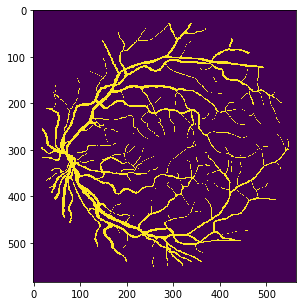

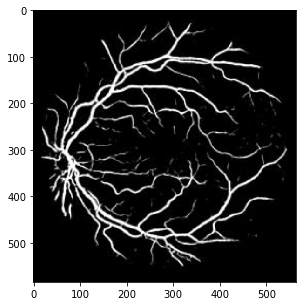

In [10]:
from skimage import io
from skimage import color
from skimage.transform import resize

#unet_pred = plt.imread('unet_output0.jpg')
#gt_img = plt.imread('21_manual1.gif')


from skimage import io
from skimage import color
from skimage.transform import resize

#unet_pred = plt.imread('unet_output0.jpg')
#gt_img = plt.imread('21_manual1.gif')
unet_pred = plt.imread('model_output_0.jpg')
gt_img = plt.imread('data/DRIVE/test/1st_manual/01_manual1.gif')
gt_img = np.flipud(gt_img)
plt.figure(figsize=(5,5))
plt.imshow(gt_img)
#plt.imsave('test_delete.png', gt_img)


unet_pred = color.rgb2gray(unet_pred)
unet_pred = np.rot90(unet_pred)#*255.0
unet_pred = resize(unet_pred, (gt_img.shape[0], gt_img.shape[1]),
                       anti_aliasing=True)
print(np.min(unet_pred))
print(unet_pred.shape)
print(gt_img.shape)
plt.figure(figsize=(5,5))
#plt.colorbar()
plt.imshow(unet_pred, cmap='gray')

print(unet_pred)

In [11]:
def get_comp2(ground_truth, prediction, plot=False):
    #import pdb; pdb.set_trace()
    prediction = prediction*255
    prediction[prediction < 180] = 5
    prediction[prediction >= 180] = 255

    sub = ground_truth - prediction
    img = np.zeros((sub.shape[0],sub.shape[1], 3))
    img[sub == -50] = [0,0,0]
    img[sub == 250] = [0,0.8,1]
    img[sub == 0] = [1,1,1]
    img[sub == -255] = [1,0,0]
    
    if(plot):
        plt.figure(figsize=(10,10))
        plt.imshow(ground_truth,cmap='gray')
        plt.figure(figsize=(10,10))
        plt.imshow(prediction, cmap='gray')
        plt.figure(figsize=(10,10))
        plt.imshow(img)

    return img

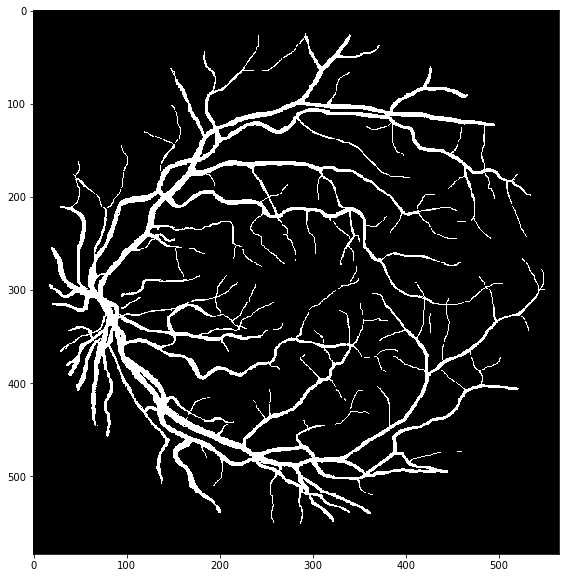

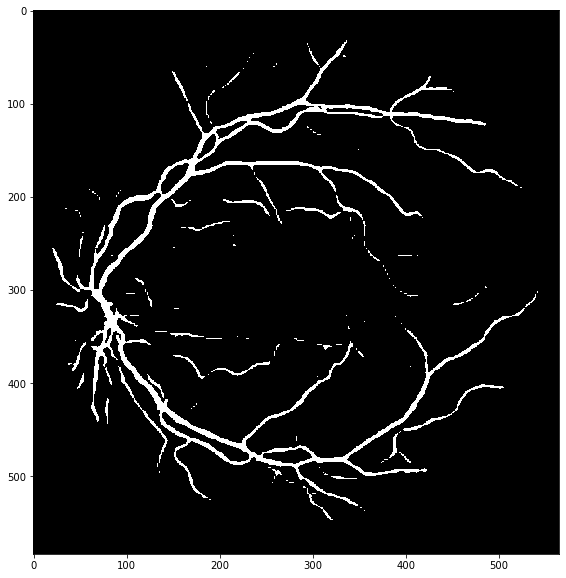

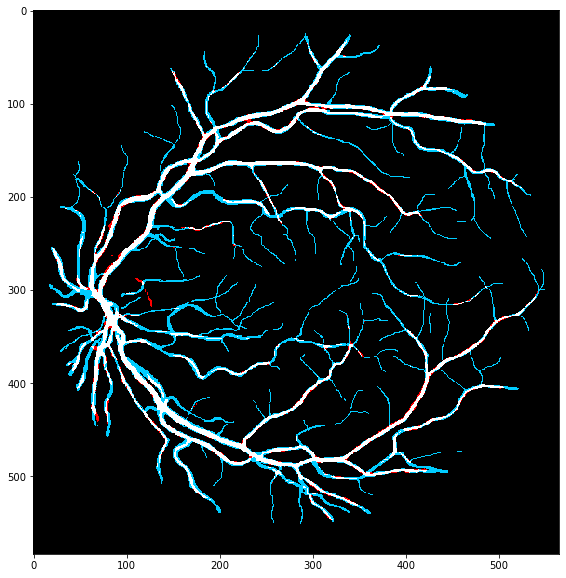

In [12]:
zz = get_comp2(gt_img, unet_pred, True)
#plt.imsave('drive_u_net_diff', zz)

In [13]:
gt_img.shape

(584, 565)

In [14]:
prediction = plt.imread('STARE/seg_result_image_1_1/im0162.png')

In [15]:
prediction.shape

(605, 700)

In [16]:
ground_truth = plt.imread('data/STARE/test/1st_manual/im0162.ah.ppm')*1.0

In [17]:
ground_truth.shape

(605, 700)

In [18]:
np.max(ground_truth)

255.0